## Karate Social Network Analysis Example
(Zachary’s Karate Club: Zachary’s karate club is a social network of a university karate club, described in the paper “An Information Flow Model for Conflict and Fission in Small Groups” by Wayne W. Zachary. The network became a popular example of community structure in networks after its use by Michelle Girvan and Mark Newman in 2002 - https://studentwork.prattsi.org/infovis/labs/zacharys-karate-club)

### Creating the graph

In [2]:
# in case these are not available at Colab (already available at environment.yml for Conda env creation)
!pip install igraph
!pip install pycairo

# importing libs (already installed using Conda - see environment.yml)
from igraph import Graph, plot
import pandas as pd
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 40.3 MB/s eta 0:00:00


In [3]:
# reading network data from the external .csv file to a DataFrame
karate_df = pd.read_csv("https://raw.githubusercontent.com/danielpm1982/sample-social-network-analysis/refs/heads/master/karate.csv", sep=";")
karate_df

,Source,Target,Type
0,0,9,Undirected
1,0,10,Undirected
2,0,14,Undirected
3,0,15,Undirected
4,0,16,Undirected
...,...,...,...
73,33,23,Undirected
74,33,24,Undirected
75,33,30,Undirected
76,33,31,Undirected


In [4]:
# transforming df into Graph
g = Graph.DataFrame(karate_df, directed=False)

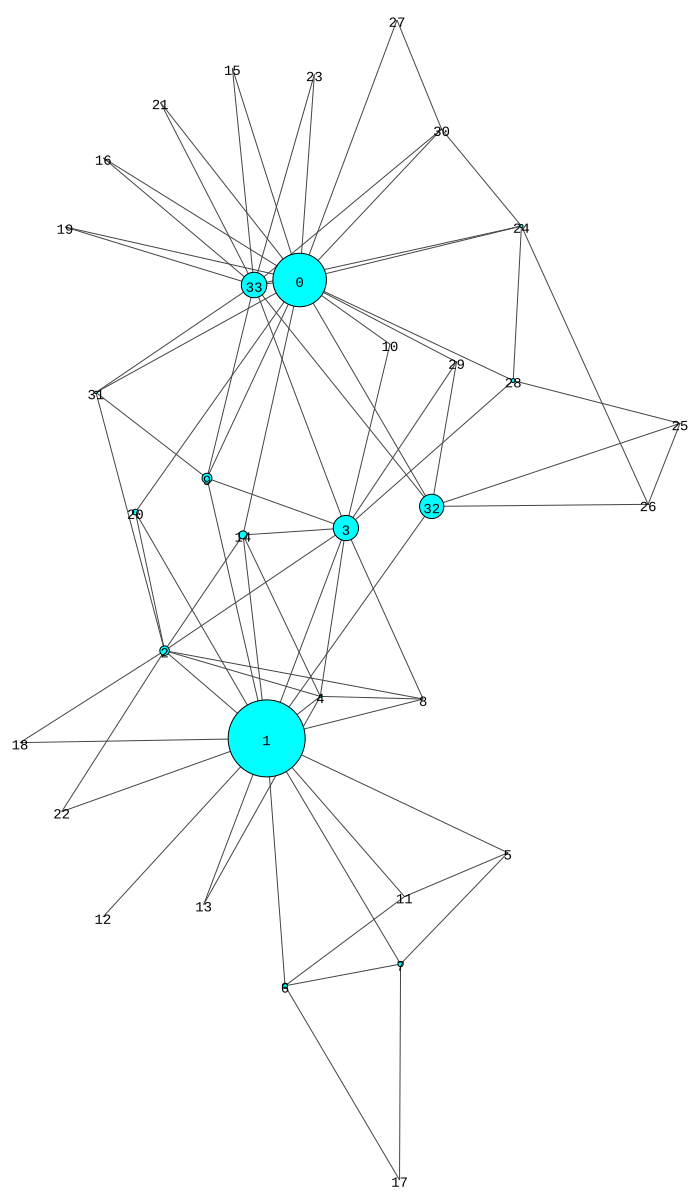

In [32]:
# plotting Graph
# This is the same graph we can see with Gephi app when opening the karate77-sna-danielpm1982.gephi file, included at this
# project folder, except for the label numbers, which vary, depending on what sequence the vertices were added in. The
# disposition of the graph on the screen also varies, as we may rotate it as we wish, but all vertices and their edges are
# exactly the same, as well as their metrics' values and possible grouping communities
# creating a label_list with numbers from 0 up until 33 (for representing each vertex or node id) and a size_list for the
# ranking size of each node being 1/3 of the node's betweenness: the higher the betweenness the bigger the node in size
vertex_label_list = [i for i in range(34)]
vertex_size_list = [i/3 for i in g.betweenness()]
plot(g, bbox=(700,1200), vertex_label=vertex_label_list, vertex_color="cyan", vertex_size=vertex_size_list)

In [6]:
# showing a printscreen of Gephi app Graph, also ranked by betweenness, and loaded with the same Karate dataset above:

![gephi-graph.png](https://github.com/danielpm1982/sample-social-network-analysis/blob/master/gephi-graph.png?raw=1)

### Karate network and node (vertice) statistics - considering the whole network relationships (not exclusively intra-community ones)

In [7]:
g.density()

0.13903743315508021

In [8]:
print(g.degree())

[17, 16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12]


In [9]:
# clustering coefficient (cc)
print(g.transitivity_local_undirected())

[0.11029411764705882, 0.15, 0.3333333333333333, 0.24444444444444446, 0.6666666666666667, 0.6666666666666666, 0.5, 0.5, 1.0, 0.5, 0.0, 0.6666666666666666, nan, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 0.4, 0.3333333333333333, 0.3333333333333333, 1.0, 0.16666666666666666, 0.3333333333333333, 0.6666666666666666, 0.5, 0.2, 0.19696969696969696]


In [10]:
g.average_path_length()

2.408199643493761

In [11]:
print(g.closeness(weights=None, normalized=True))

[0.55, 0.5689655172413793, 0.4852941176470588, 0.559322033898305, 0.4647887323943662, 0.3793103448275862, 0.38372093023255816, 0.38372093023255816, 0.44, 0.515625, 0.4342105263157895, 0.3793103448275862, 0.36666666666666664, 0.3707865168539326, 0.515625, 0.3707865168539326, 0.3707865168539326, 0.28448275862068967, 0.375, 0.3707865168539326, 0.5, 0.3707865168539326, 0.375, 0.3707865168539326, 0.39285714285714285, 0.375, 0.375, 0.3626373626373626, 0.4583333333333333, 0.4520547945205479, 0.38372093023255816, 0.4583333333333333, 0.5409836065573771, 0.515625]


In [12]:
print(g.betweenness(weights=None))

[160.55158730158732, 231.0714285714286, 28.478571428571424, 75.85079365079368, 6.288095238095236, 0.3333333333333333, 15.833333333333334, 15.833333333333332, 0.0, 29.529365079365082, 0.44761904761904764, 0.3333333333333333, 0.0, 0.0, 24.21587301587301, 0.0, 0.0, 0.0, 0.0, 0.0, 17.146825396825403, 0.0, 0.0, 0.0, 9.299999999999999, 1.1666666666666665, 2.0277777777777777, 0.0, 11.792063492063491, 0.9476190476190476, 1.5428571428571427, 7.609523809523807, 73.0095238095238, 76.69047619047618]


In [13]:
print(g.eccentricity())

[4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 5.0, 5.0, 5.0, 4.0, 5.0, 3.0, 5.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 4.0, 3.0, 4.0]


In [14]:
g.diameter()

5

In [15]:
g.radius()

3

In [16]:
g.articulation_points()

[1]

In [17]:
# creating and calling a custom function that receives a network Graph instance and a list with the vertices' names as int numbers
# (node_ids), starting from zero, and that returns a DataFrame with the stats of the network as a whole (NOT of each community)
def network_statistics(network_graph, node_id_list:list) -> pd.DataFrame:
    df = pd.DataFrame({"node_id":node_id_list})
    df["degree"] = network_graph.degree()
    df["cc"] = network_graph.transitivity_local_undirected()
    df["closeness"] = network_graph.closeness(weights=None, normalized=True)
    df["betweenness"] = network_graph.betweenness()
    df["bridge"] = df["node_id"].isin(network_graph.articulation_points()).astype(int)
    return df

# calling the function above passing the Graph instance g used before:
network_statistics_df = network_statistics(g, list(range(g.vcount())))
network_statistics_df

# later below, we're gonna find the ideal communities for this same network and, for each one, we'll generate a similar DataFrame
# with the stats for the same node_ids, but considered only the individual community where these nodes have been classified at,
# not the whole network. The stats will vary, and the values we should consider would depend on the context of the problem: if the
# stats of each node, considered its relationships to the network as a whole, or the stats of each node only consired the community
# it actually belongs to, and its relationships with the nodes of the same community, not the nodes of different communities of
# this same network

,node_id,degree,cc,closeness,betweenness,bridge
0,0,17,0.110294,0.550000,160.551587,0
1,1,16,0.150000,0.568966,231.071429,1
2,2,9,0.333333,0.485294,28.478571,0
3,3,10,0.244444,0.559322,75.850794,0
4,4,6,0.666667,0.464789,6.288095,0
5,5,3,0.666667,0.379310,0.333333,0
6,6,4,0.500000,0.383721,15.833333,0
7,7,4,0.500000,0.383721,15.833333,0
8,8,4,1.000000,0.440000,0.000000,0
9,9,5,0.500000,0.515625,29.529365,0


![gephi-table.png](https://github.com/danielpm1982/sample-social-network-analysis/blob/master/gephi-table.png?raw=1)

### Communities detection (resolution, modularity, number of ideal communities, number of entities at each community and related communities' stats)

In [18]:
# As seen on the Gephi picture above - with all main metrics, and for M10 column, that is, for resolution equal to 1.0, we had
# the formation of 4 communities of nodes (vertices) (for the same dataset above), with a given modularity. The partitioning can
# be observed through the separation of colors - one for each community, on the picture below - also ranked by the betweeness:

![gephi-communities.png](https://github.com/danielpm1982/sample-social-network-analysis/blob/master/gephi-communities.png?raw=1)

In [19]:
# now let's check out how to find these communities using Python, instead of Gephi. There are multiple possible algorithms for
# that, ideally we should test all of them and compare with our business case, in order to see if the found number of communities
# and granularity are compatible to the solution we need. There's not an exact solution for finding communities, we should choose
# the classification that better represents our real world scenario. Each communities finding algorithm returns a Dendogram, which
# than can be cut into "cluster" groups, representing each "cluster" a community of vertices within that network. Communities are
# different from Clusters, as the first only consider the conections between any type of entities at a network (including
# completely different ones), while the latter consider the similarity of entities regarding their features (and not simply their
# conections). Nevertheless, the API below uses the term "cluster" and "clustering", which is not quite correct, in this case.

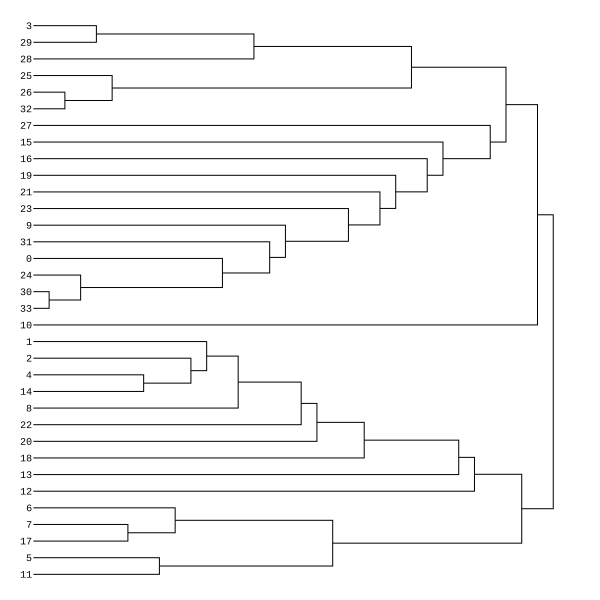

In [20]:
# algorithm: cluster edge betweenness
community_ceb_dendogram = g.community_edge_betweenness()
plot(community_ceb_dendogram)

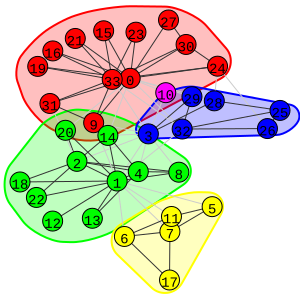

In [21]:
# based on the dendogram above, and for the "cluster edge betweenness" algorithm, we can then find and output the clustering
# representation, as below:
community_ceb_cluster = community_ceb_dendogram.as_clustering()
visual_style = dict()
visual_style["bbox"] = (300,300)
plot(community_ceb_cluster, mark_groups = True, **visual_style, vertex_label=vertex_label_list)

# in the case of this algorithm result, we'd have 4 communities of vertices - segmented by the colors: red, blue, green and yellow.
# Each vertex can only belong to one community, not to any other, although it can have relationships with vertices from other
# communities, and not only to vertices inside its own community. We should verify if the classification below makes sense to
# our business case or not. If not, check other algorithms' results.

In [22]:
community_ceb_cluster.modularity

# for the same number of communities found, the higher the modularity the better the classification of individual vertices
# inside those communities. You should analyse what number of communities makes more sense with your business case, and then
# you may choose the algorithm result with the highest modularity. At the end of the day, its up to you to choose the result.

0.40129848783694944

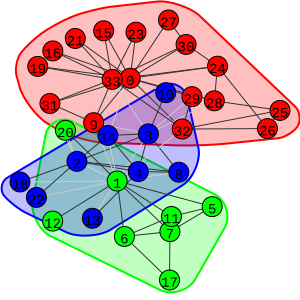

In [23]:
# algorithm: fast greedy
community_fg_dendogram = g.community_fastgreedy()
community_fg_cluster = community_fg_dendogram.as_clustering()
plot(community_fg_cluster, mark_groups = True, **visual_style, vertex_label=vertex_label_list)

In [24]:
community_fg_cluster.modularity

0.3806706114398422

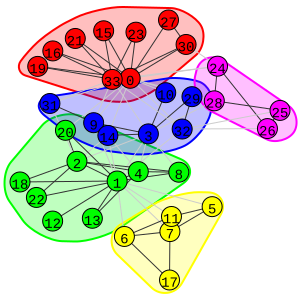

In [25]:
# algorithm: walktrap
community_wtrap_dendogram = g.community_walktrap()
community_wtrap_cluster = community_wtrap_dendogram.as_clustering()
plot(community_wtrap_cluster, mark_groups = True, **visual_style, vertex_label=vertex_label_list)

In [26]:
community_wtrap_cluster.modularity

0.35322156476002636

In [27]:
# creating and calling a custom function for testing all possible algorithms and comparing the communities detected:
# Firstly, we create a dictionary with the algorithms' names and the returned list of communities found at the network when used
# each of such algorithms
# Secondly, we iterate the dictionary and, for each algorithm, we calculate the stats for the communities found by that current
# algorithm
# Finally, we show all those results, by type of algorithm, at a DataFrame. This helps deciding which algorithm actually to use.

all_algorithms_communities_as_clusters = {
    "Edge Betweenness": g.community_edge_betweenness().as_clustering(),
    "Fast Greedy": g.community_fastgreedy().as_clustering(),
    "Wakltrap": g.community_walktrap().as_clustering(),
    "Louvain": g.community_multilevel(),
    "Label Propagation": g.community_label_propagation(),
    "Spin Glass": g.community_spinglass()
}
results = []
for algorith_name, communities_as_clusters in all_algorithms_communities_as_clusters.items():
    modularity = communities_as_clusters.modularity
    communities_number = len(communities_as_clusters)
    community_size_list = [len(community) for community in communities_as_clusters]
    min_size = np.min(community_size_list)
    max_size = np.max(community_size_list)
    mean_size = np.mean(community_size_list)
    std_size = np.std(community_size_list)
    results.append([
        algorith_name,
        modularity,
        communities_number,
        community_size_list,
        min_size,
        max_size,
        mean_size,
        std_size
    ])

results_df = pd.DataFrame(results, columns=[
    "Algorithm Name (method)",
    "Modularity",
    "Number Of Communities",
    "List Of Communities' Sizes",
    "Size of the Minimum Size Community",
    "Size of the Maximum Size Community",
    "Mean Size Of Communities",
    "Standard Deviation (std) of Sizes Of Communities"
])

print(results_df)

  Algorithm Name (method)  Modularity  Number Of Communities  \
0        Edge Betweenness    0.401298                      5   
1             Fast Greedy    0.380671                      3   
2                Wakltrap    0.353222                      5   
3                 Louvain    0.418803                      4   
4       Label Propagation    0.352318                      2   
5              Spin Glass    0.419790                      4   

  List Of Communities' Sizes  Size of the Minimum Size Community  \
0          [12, 10, 6, 5, 1]                                   1   
1                 [17, 8, 9]                                   8   
2            [9, 9, 7, 5, 4]                                   4   
3             [11, 12, 5, 6]                                   5   
4                   [15, 19]                                  15   
5             [5, 11, 6, 12]                                   5   

   Size of the Maximum Size Community  Mean Size Of Communities  \
0      

### Karate network and node (vertice) statistics - considering exclusively intra-community relationships (not whole network ones)

In [28]:
# creating and calling a custom function that receives NOT a network Graph instance, with the network as a whole, but only a single
# community of such a network, and a list with the vertices' names as int numbers (node_ids), starting from zero, and that returns
# a DataFrame with the stats of that community alone (NOT of the whole network). Only the relationships between the vertices
# inside that single community are considered, while the relationships of that community entities with entities at other
# communities simply are ignored. The usefulness of such approach depends on the business context.
def community_statistics(community, node_id_list:list) -> pd.DataFrame:
    df = pd.DataFrame({"node_id":node_id_list})
    df["degree"] = community.degree()
    df["cc"] = community.transitivity_local_undirected()
    df["closeness"] = community.closeness(weights=None, normalized=True)
    df["betweenness"] = community.betweenness()
    df["bridge"] = df["node_id"].isin(community.articulation_points()).astype(int)
    return df

# Using the multilevel algorithm for obtaining the communities of the karate network:
community_multilevel = g.community_multilevel()

# Getting a df with the node ids and their respective community ids. This will show all nodes of the network and their respective
# communities. The "membership" attribute here is a list with the corresponding community id for each node id, in the sequence
# the nodes were added to the network. Therefore, we take its length to mount a list with the int id of each node, and keep the
# already calculated association of each such node id with its respective community
network_karate_communities_df = pd.DataFrame({"node_id": list(range(len(community_multilevel.membership))),
                                              "membership": community_multilevel.membership})

# Getting distinct communities ids (unique memberships) as an ndarray
network_karate_communities_distinct = network_karate_communities_df["membership"].unique()

# Iterating each unique community id (membership) for showing the respective stats regarding that single community alone - at each
# iteration (instead of regarding the whole network). Each membership (community id) will have its own stats df, from the result
# of the function community_statistics() above, along with its own exclusive nodes (whom those stats are calculated from).
# The node_id_list_per_community_id is obtained by filtering the network_karate_communities_df, selecting, at each iteration of
# distinct communities, only the rows for the current network_karate_community_id, that is, for the current community. After
# filtering that df, we the get the "node_id" series of the resulting rows, and transform that to a list: the
# node_id_list_per_community_id list. This list has only the node ids for the community (membership) of the current iteration.
# Having the current iteration community id and its belonging node ids, we can finally call the community_statistics() function,
# for getting the stats for the current iteration community alone, passing, as args, the subgraph of the community_multilevel,
# for that current iteration community id, and the respective node ids, only of that community in particular. The result of that
# is a stats df only for that current iteration community, that we append to the single_community_stats_df_list, which, in turn,
# will contain each stats df of each single community - one at a time.
single_community_stats_df_list = []
for network_karate_community_id in network_karate_communities_distinct:
    node_id_list_per_community_id = network_karate_communities_df[network_karate_communities_df["membership"]==network_karate_community_id]["node_id"].tolist()
    single_community_stats_df_list.append(community_statistics(community_multilevel.subgraphs()[network_karate_community_id],
                                                               node_id_list_per_community_id))

# We then concatenate all communities of the single_community_stats_df_list and merge it with the network_karate_communities_df,
# sorting the rows by the membership column. This way, we have all the node ids and their respective stats regarding only the
# membership they belong, and not regarding the whole network.
single_community_stats_df_list_concatenated = pd.concat(single_community_stats_df_list)
single_community_stats_df_list_concatenated = single_community_stats_df_list_concatenated.merge(
    network_karate_communities_df, on="node_id", how="left").sort_values(by="membership")

# For a utmost and final comparison, we can further merge the stats regarding the network as a whole - network_statistics_df,
# calculated way above, with the stats per community, calculated here. This will give a final df containing, for each node id,
# all calculated stats in this project, both regarding the community-only stats as the whole network stats. The stats are
# different, as their calculations also are - when considered only the node connections intra or also extra communities, and
# we gotta chose which stats to use according to our business case scenario.
single_community_stats_plus_network_stats = single_community_stats_df_list_concatenated.merge(
    network_statistics_df, on=["node_id"], how="inner", suffixes=["_community_only", "_whole_network"])
single_community_stats_plus_network_stats

,node_id,degree_community_only,cc_community_only,closeness_community_only,betweenness_community_only,bridge_community_only,membership,degree_whole_network,cc_whole_network,closeness_whole_network,betweenness_whole_network,bridge_whole_network
0,0,10,0.222222,1.000000,21.000000,0,0,17,0.110294,0.550000,160.551587,0
1,9,3,1.000000,0.588235,0.000000,0,0,5,0.500000,0.515625,29.529365,0
2,15,2,1.000000,0.555556,0.000000,0,0,2,1.000000,0.370787,0.000000,0
3,16,2,1.000000,0.555556,0.000000,0,0,2,1.000000,0.370787,0.000000,0
4,19,2,1.000000,0.555556,0.000000,0,0,2,1.000000,0.370787,0.000000,0
5,21,2,1.000000,0.555556,0.000000,0,0,2,1.000000,0.370787,0.000000,0
6,23,2,1.000000,0.555556,0.000000,0,0,2,1.000000,0.370787,0.000000,0
7,27,2,1.000000,0.555556,0.000000,0,0,2,1.000000,0.362637,0.000000,0
8,30,3,0.666667,0.588235,0.500000,0,0,4,0.666667,0.383721,1.542857,0
9,31,3,1.000000,0.588235,0.000000,0,0,4,0.500000,0.458333,7.609524,0
